Hussein Hamie
500876254
AER 850 Machine Learning
Assignment 1

We Begin by importing the initial libraries for plotting and data preprocessing

In [94]:
# Importing of libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [111]:
# Function used to import datasets. The function saves X and Y Columns as Numpy arrays and reshapes them in 2D form.

def getdata(filename):
    with open (filename,'r') as csvfile:
        csvData = pd.read_csv(csvfile,header=None)
        #Ordering the data properly
        csvData.sort_values(csvData.columns[0],axis=0,inplace=True)
        print(csvData)
        X = csvData.iloc[:,[0]].to_numpy()
        Y = csvData.iloc[:,[1]].to_numpy()
        print(X)


    return X , Y

In [112]:
#Importing all datasets using get data function and assigning X and Y respectively
X_test, Y_test = getdata("Dataset1/Dataset_1_test.csv")
X_train, Y_train = getdata("Dataset1/Dataset_1_train.csv")
X_valid, Y_valid = getdata("Dataset1/Dataset_1_valid.csv")

           0          1   2
31 -0.988770  -6.497606 NaN
23 -0.913618  -5.110324 NaN
32 -0.895417 -11.813734 NaN
3  -0.860443  -3.800950 NaN
2  -0.819361  -9.321124 NaN
37 -0.789856  -5.923314 NaN
11 -0.780743 -10.921434 NaN
49 -0.758574 -10.768728 NaN
24 -0.698714 -11.098282 NaN
6  -0.627858  -6.709161 NaN
39 -0.618156  -3.162021 NaN
48 -0.499098   2.344141 NaN
12 -0.488943 -10.539182 NaN
13 -0.458625  -3.586555 NaN
8  -0.427498  -3.513751 NaN
35 -0.414263  -6.832803 NaN
0  -0.335254  -2.953401 NaN
33 -0.300863   1.659256 NaN
17 -0.283256  -6.700334 NaN
44 -0.215044  -0.091022 NaN
21 -0.184763  -5.287415 NaN
18 -0.097897  -5.630283 NaN
40 -0.076718  -2.946125 NaN
27 -0.073859  -6.728111 NaN
5  -0.007729  -3.405798 NaN
1   0.122457  -5.836786 NaN
26  0.191167  -0.802697 NaN
36  0.194400  -4.639020 NaN
20  0.232616   0.908847 NaN
41  0.239000  -3.462470 NaN
9   0.352504  -3.073887 NaN
28  0.411078   5.010641 NaN
19  0.419778   1.357183 NaN
4   0.422628   2.100318 NaN
22  0.442216  -4.053

Now we plot all three data sets so we can visualize the distribution we are trying to plot

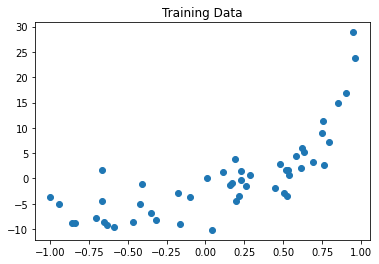

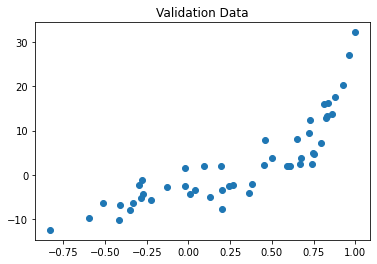

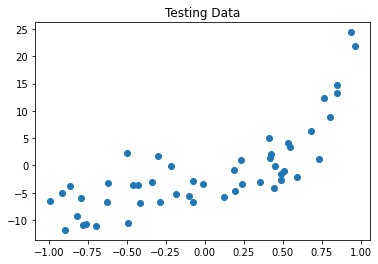

In [113]:
plt.scatter(X_train,Y_train)
plt.title('Training Data')
plt.show()
plt.scatter(X_valid,Y_valid)
plt.title('Validation Data')
plt.show()
plt.scatter(X_test,Y_test)
plt.title('Testing Data')
plt.show()

0.9024295774682074


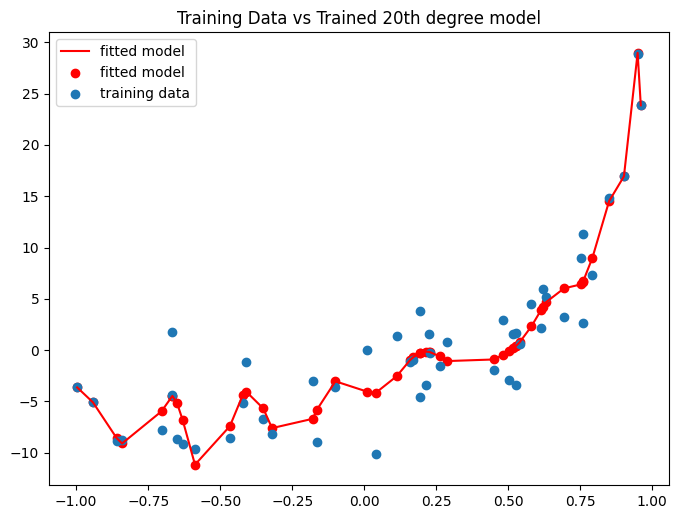

In [121]:
from sklearn.metrics import r2_score

mymodel=np.polynomial.Polynomial.fit(X_train.flatten(),Y_train.flatten(),20)
print(r2_score(Y_train.flatten(), mymodel(X_train.flatten())))


plt.figure(figsize=(8, 6), dpi=100)
plt.plot(X_train,mymodel(X_train), label='fitted model',color='red')
plt.scatter(X_train,mymodel(X_train), label='fitted model',color='red')
plt.scatter(X_train,Y_train, label='training data')
plt.title("Training Data vs Trained 20th degree model")
plt.legend()
plt.show()

-14.652833534486565


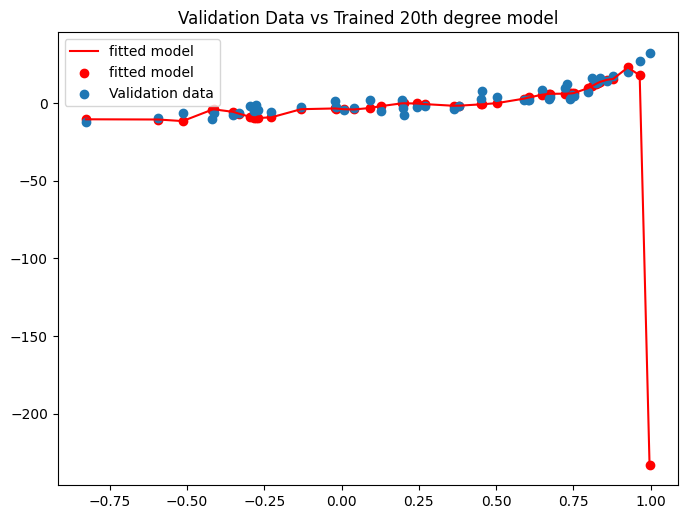

In [123]:
print(r2_score(Y_valid.flatten(), mymodel(X_valid.flatten())))


plt.figure(figsize=(8, 6), dpi=100)
plt.plot(X_valid,mymodel(X_valid), label='fitted model',color='red')
plt.scatter(X_valid,mymodel(X_valid), label='fitted model',color='red')
plt.scatter(X_valid,Y_valid, label='Validation data')
plt.title("Validation Data vs Trained 20th degree model")
plt.legend()
plt.show()

In [116]:
from sklearn.svm import SVR

In [117]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=20, epsilon=0.1, coef0=1)

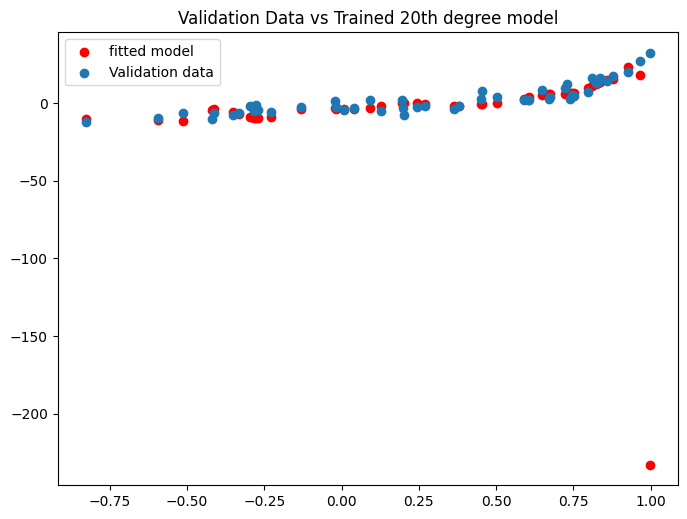

In [119]:
X = X_train.reshape(-1, 1)
y= Y_train.reshape(-1, 1)

plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(X_valid,mymodel(X_valid), label='fitted model',color='red')
plt.scatter(X_valid,Y_valid, label='Validation data')
plt.title("Validation Data vs Trained 20th degree model")
plt.legend()
plt.show()

D:\codefiles\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\codefiles\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\codefiles\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


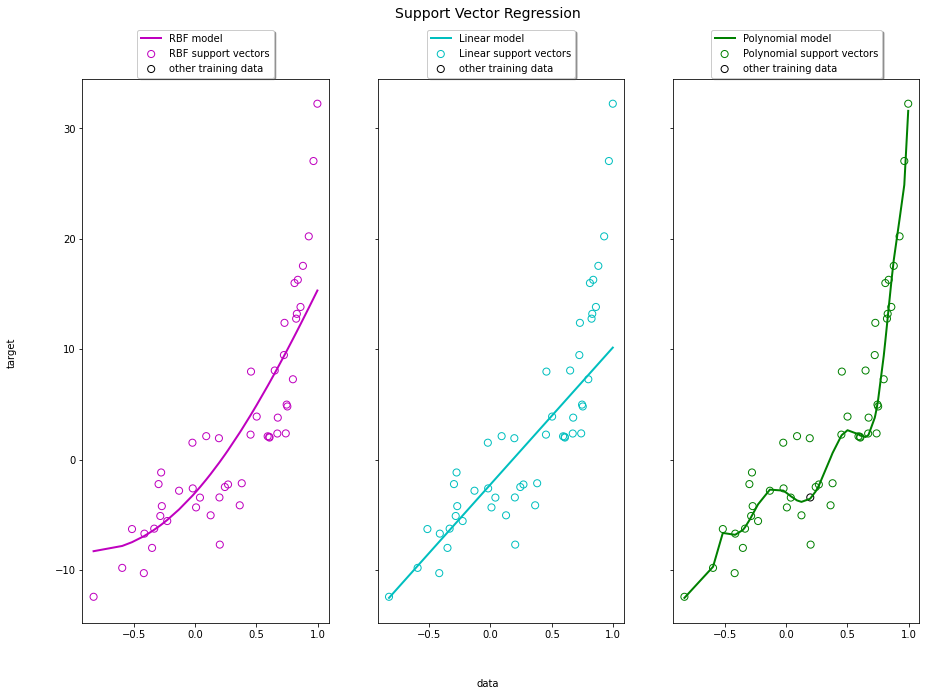

In [124]:
X = X_valid.reshape(-1, 1)
y= Y_valid.reshape(-1, 1)

lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

PART B:
Adding L1 Regularization